### 1. Analyze the relationship between cholesterol levels and heart attack risk, considering additional factors such as BMI, blood pressure, triglyceride levels, and lifestyle habits. What patterns indicate a stronger correlation?

Data: https://drive.google.com/file/d/13ShLPdVJdjiCsyIuif4Ih45ZUA9Zu8Zz/view?usp=sharing

In [1]:
#importing neccesaries libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
heart_attack = pd.read_csv("Heart_Attack_Male.csv")
heart_attack.head(3)

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East_M,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,27,Male,East_M,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
2,20,Male,West_M,Rural,Middle,Never,Never,Non-Vegetarian,High,2,...,High,171.5/107.1,115,Normal,Atypical,142,No,93.0,129,No


# Data Cleaning

In [4]:
#checking for missing values
heart_attack.isnull().sum()

Age                                         0
Gender                                      0
Region                                      0
Urban/Rural                                 0
SES                                         0
Smoking Status                              0
Alcohol Consumption                         0
Diet Type                                   0
Physical Activity Level                     0
Screen Time (hrs/day)                       0
Sleep Duration (hrs/day)                    0
Family History of Heart Disease             0
Diabetes                                    0
Hypertension                                0
Cholesterol Levels (mg/dL)                  0
BMI (kg/m²)                                 0
Stress Level                                0
Blood Pressure (systolic/diastolic mmHg)    0
Resting Heart Rate (bpm)                    0
ECG Results                                 0
Chest Pain Type                             0
Maximum Heart Rate Achieved       

The data has not missing value(s)

In [5]:
#checking for the summary statistics of the numerical columns
heart_attack.describe()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL)
count,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000
mean,26.561368,7.587421,6.496031,198.915734,27.510706,89.507633,159.683086,94.886912,275.079178
std,5.192189,4.601256,2.295379,57.430675,7.186908,17.262664,35.022676,2.894265,129.154008
min,18.000000,0.000000,3.000000,100.000000,15.000000,60.000000,100.000000,90.000000,50.000000
25%,22.000000,4.000000,5.000000,149.000000,21.300000,75.000000,129.000000,92.300000,163.000000
50%,27.000000,8.000000,6.000000,199.000000,27.700000,90.000000,159.000000,94.900000,278.000000
75%,31.000000,12.000000,9.000000,248.000000,33.600000,104.000000,189.000000,97.400000,386.000000
max,35.000000,15.000000,10.000000,300.000000,40.000000,119.000000,220.000000,100.000000,500.000000


possible outliers are Screen Time (hrs/day) = 0 and Triglyceride Levels (mg/dL) = 500

In [6]:
#checking for duplicate value(s)
heart_attack_non_duplicate = heart_attack.drop_duplicates (keep= "first")
heart_attack_non_duplicate

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East_M,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,27,Male,East_M,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
2,20,Male,West_M,Rural,Middle,Never,Never,Non-Vegetarian,High,2,...,High,171.5/107.1,115,Normal,Atypical,142,No,93.0,129,No
3,29,Male,East_M,Rural,High,Regularly,Never,Non-Vegetarian,Moderate,8,...,Low,176.7/110.0,118,Normal,Non-anginal,181,No,93.4,444,No
4,35,Male,West_M,Urban,High,Occasionally,Never,Non-Vegetarian,Sedentary,12,...,High,140.5/106.1,110,Normal,Asymptomatic,141,No,97.1,297,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,21,Male,North-East_M,Rural,Low,Never,Never,Non-Vegetarian,Sedentary,1,...,Low,134.3/89.5,82,Normal,Typical,157,No,95.3,205,No
4909,21,Male,South_M,Urban,High,Occasionally,Never,Vegetarian,Sedentary,13,...,Low,106.2/112.7,107,Normal,Typical,206,No,99.7,416,Yes
4910,22,Male,North-East_M,Urban,Low,Never,Never,Vegetarian,High,13,...,Medium,131.1/100.6,110,Normal,Non-anginal,122,No,91.6,495,No
4911,32,Male,West_M,Urban,Middle,Regularly,Never,Non-Vegetarian,Moderate,1,...,High,120.8/81.3,62,Normal,Typical,171,No,98.6,319,No


The dataset has no duplicate value(s)

In [7]:
#checking for info summary of the dataset
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       4913 non-null   int64  
 1   Gender                                    4913 non-null   object 
 2   Region                                    4913 non-null   object 
 3   Urban/Rural                               4913 non-null   object 
 4   SES                                       4913 non-null   object 
 5   Smoking Status                            4913 non-null   object 
 6   Alcohol Consumption                       4913 non-null   object 
 7   Diet Type                                 4913 non-null   object 
 8   Physical Activity Level                   4913 non-null   object 
 9   Screen Time (hrs/day)                     4913 non-null   int64  
 10  Sleep Duration (hrs/day)            

### 1. Analyze the relationship between cholesterol levels and heart attack risk, considering additional factors such as BMI, blood pressure, triglyceride levels, and lifestyle habits. What patterns indicate a stronger correlation?

In [19]:
selected_heart_attack_factors = heart_attack [["Cholesterol Levels (mg/dL)", "Heart Attack Likelihood", "BMI (kg/m²)", 
"Blood Pressure (systolic/diastolic mmHg)", "Triglyceride Levels (mg/dL)" , "Smoking Status", "Alcohol Consumption"]]
selected_heart_attack_factors

,Cholesterol Levels (mg/dL),Heart Attack Likelihood,BMI (kg/m²),Blood Pressure (systolic/diastolic mmHg),Triglyceride Levels (mg/dL),Smoking Status,Alcohol Consumption
0,148,No,34.4,177.0/63.1,58,Never,Regularly
1,137,Yes,19.0,177.1/90.0,102,Occasionally,Never
2,205,No,15.5,171.5/107.1,129,Never,Never
3,278,No,21.4,176.7/110.0,444,Regularly,Never
4,268,No,30.7,140.5/106.1,297,Occasionally,Never
...,...,...,...,...,...,...,...
4908,161,No,25.7,134.3/89.5,205,Never,Never
4909,283,Yes,39.7,106.2/112.7,416,Occasionally,Never
4910,175,No,35.4,131.1/100.6,495,Never,Never
4911,221,No,22.9,120.8/81.3,319,Regularly,Never


In [20]:
#checking the columns contained in the selected_heart_attack_factors
print(selected_heart_attack_factors.columns)

Index(['Cholesterol Levels (mg/dL)', 'Heart Attack Likelihood', 'BMI (kg/m²)',
       'Blood Pressure (systolic/diastolic mmHg)',
       'Triglyceride Levels (mg/dL)', 'Smoking Status', 'Alcohol Consumption'],
      dtype='object')


In [21]:
#checking the unique values and counts in the column Smoking status
selected_heart_attack_factors["Smoking Status"].value_counts()

Smoking Status
Never           2456
Occasionally    1449
Regularly       1008
Name: count, dtype: int64

In [22]:
#checking the unique values and counts in the column Alcohol consumption
selected_heart_attack_factors["Alcohol Consumption"].value_counts()

Alcohol Consumption
Never           2952
Occasionally    1481
Regularly        480
Name: count, dtype: int64

In [23]:
#checking the unique values and counts in the column Heart Attack likelihood
selected_heart_attack_factors["Heart Attack Likelihood"].value_counts()

Heart Attack Likelihood
No     3865
Yes    1048
Name: count, dtype: int64

In [28]:
# One-Hot Encode "Smoking Status" and "Alcohol Consumption"
selected_heart_attack_factors = pd.get_dummies(
    selected_heart_attack_factors, 
    columns=["Smoking Status", "Alcohol Consumption"], 
    drop_first=True  # Drop the first category to avoid redundancy
)

# Convert "Heart Attack Likelihood" to binary (Yes → 1, No → 0)
selected_heart_attack_factors["Heart Attack Likelihood"] = (
    selected_heart_attack_factors["Heart Attack Likelihood"].map({"No": 0, "Yes": 1})
)

# Display the first few rows to confirm changes
print(selected_heart_attack_factors.head())

KeyError: "None of [Index(['Smoking Status', 'Alcohol Consumption'], dtype='object')] are in the [columns]"

In [31]:
#REechecking the columns
print(selected_heart_attack_factors.columns)

Index(['Cholesterol Levels (mg/dL)', 'Heart Attack Likelihood', 'BMI (kg/m²)',
       'Triglyceride Levels (mg/dL)', 'Smoking Status_Occasionally',
       'Smoking Status_Regularly', 'Alcohol Consumption_Occasionally',
       'Alcohol Consumption_Regularly', 'Systolic BP', 'Diastolic BP'],
      dtype='object')


The Blood pressure column is seen as a string instead of numeric, hence i will be splitting the column into systolic and diastolic columns so 
it can stand separately and be numeric


In [29]:
# Split "Blood Pressure (systolic/diastolic mmHg)" into two columns
selected_heart_attack_factors[["Systolic BP", "Diastolic BP"]] = (
    selected_heart_attack_factors["Blood Pressure (systolic/diastolic mmHg)"]
    .str.split("/", expand=True)
    .astype(float)  # Convert to numeric
)

# Drop the original blood pressure column
selected_heart_attack_factors.drop(columns=["Blood Pressure (systolic/diastolic mmHg)"], inplace=True)

KeyError: 'Blood Pressure (systolic/diastolic mmHg)'

In [32]:
selected_heart_attack_factors.head()

,Cholesterol Levels (mg/dL),Heart Attack Likelihood,BMI (kg/m²),Triglyceride Levels (mg/dL),Smoking Status_Occasionally,Smoking Status_Regularly,Alcohol Consumption_Occasionally,Alcohol Consumption_Regularly,Systolic BP,Diastolic BP
0,148,0,34.4,58,False,False,False,True,177.0,63.1
1,137,1,19.0,102,True,False,False,False,177.1,90.0
2,205,0,15.5,129,False,False,False,False,171.5,107.1
3,278,0,21.4,444,False,True,False,False,176.7,110.0
4,268,0,30.7,297,True,False,False,False,140.5,106.1


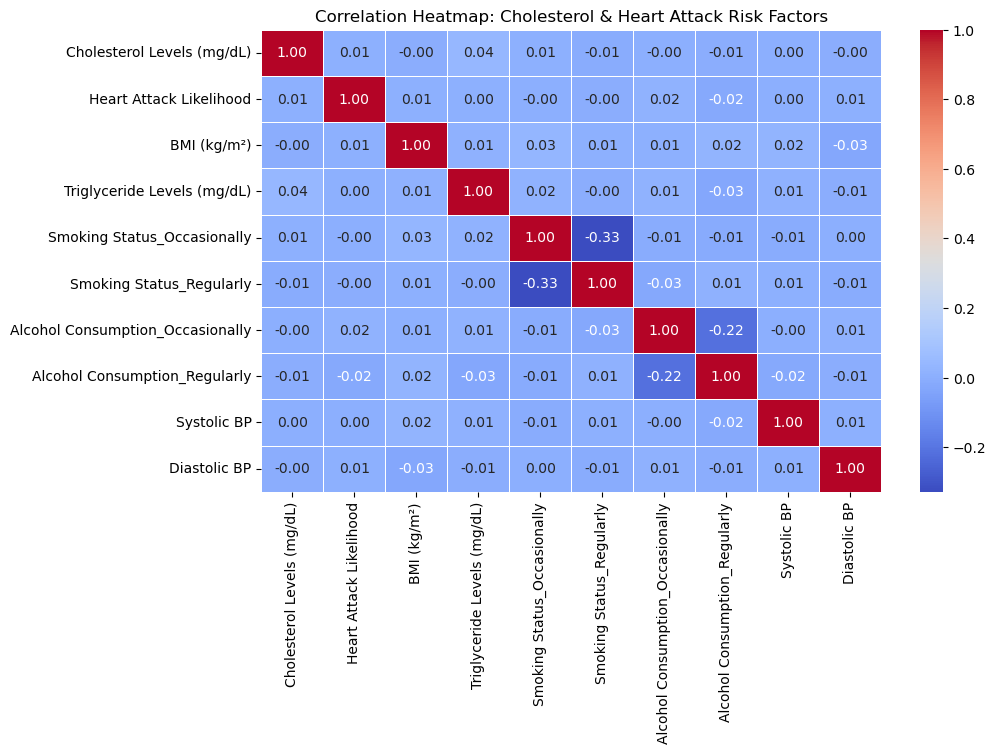

In [33]:
corr_matrix = selected_heart_attack_factors.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap: Cholesterol & Heart Attack Risk Factors")
plt.savefig("correlation.png")
plt.show()

from the above, i don't see any possible correlation, especially with cholestorol and Heart Attack likelihood which is unsuasl,in 
medical research, cholesterol, BMI, smoking, and alcohol consumption typically show stronger correlations with heart attack likelihood.
Hence this dataset is most likely not correct

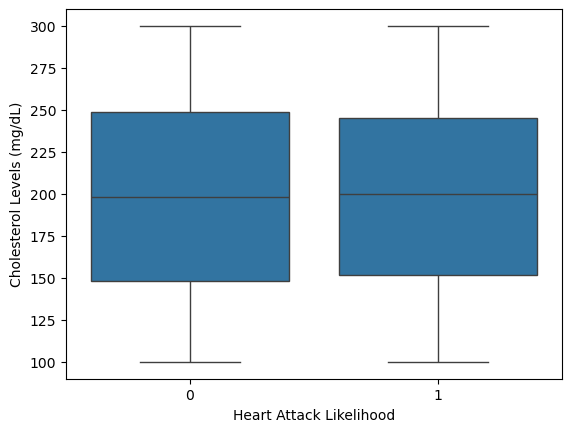

In [34]:
sns.boxplot(data=selected_heart_attack_factors, 
            x='Heart Attack Likelihood', 
            y='Cholesterol Levels (mg/dL)')

plt.show()

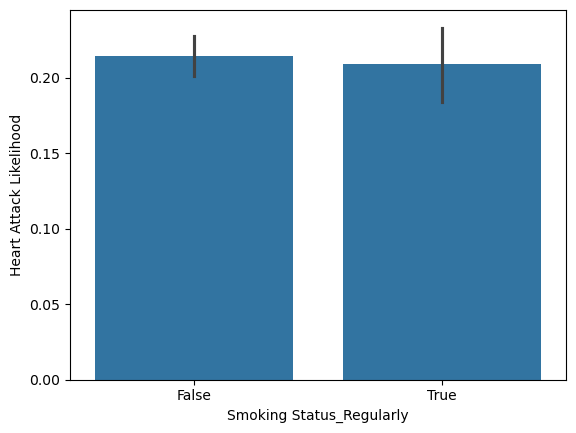

In [36]:
sns.barplot(data=selected_heart_attack_factors, 
            x='Smoking Status_Regularly', 
            y='Heart Attack Likelihood')
plt.show()

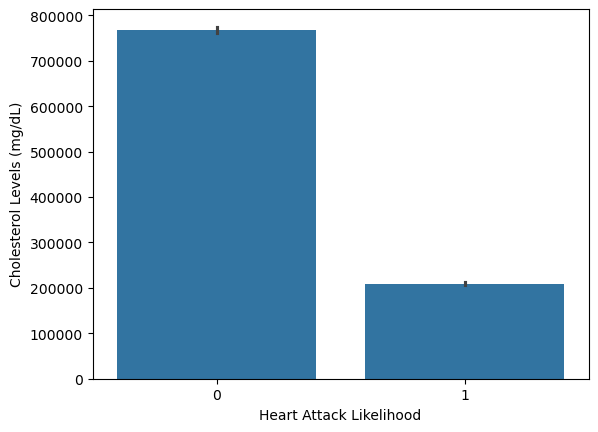

In [37]:
sns.barplot(data=selected_heart_attack_factors, 
            x='Heart Attack Likelihood', 
            y='Cholesterol Levels (mg/dL)', 
            estimator=np.sum)  # or estimator=len

plt.show()


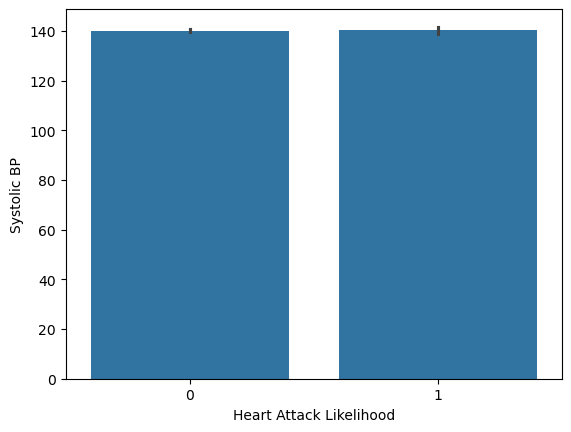

In [38]:
sns.barplot(data=selected_heart_attack_factors, 
            x='Heart Attack Likelihood', 
            y='Systolic BP')
plt.show()

### 2. Visualize how profit is distributed across different categories using a pie chart, and explode the wedge with the highest percentage of profit across all categories.

Data: https://drive.google.com/file/d/1-cCEA9WxaLbjx8MwQJUfrQOfznnE_r5k/view?usp=sharing

In [40]:
super_store = pd.read_csv("Superstore (1).csv")
super_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [41]:
super_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [42]:
#checkingthe summary statistics
super_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.857901,3.789574,0.156203,28.656599
std,32063.693350,623.245124,2.225110,0.206452,234.260115
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [43]:
super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Query 2 Answer:

In [44]:
profit_by_category = super_store.groupby("Category")["Profit"].sum()
profit_by_category

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145451.9773
Name: Profit, dtype: float64

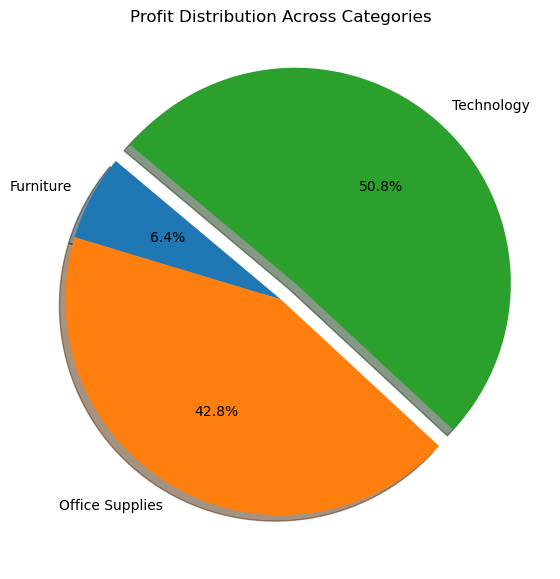

In [48]:
# Extract category names and profit values
categories = profit_by_category.index.tolist()  # List of category names
profits = profit_by_category.values  # Corresponding profit values

# Find the category with the highest profit
max_index = profits.argmax()  # Index of the max profit category

# Create explode list
explode = [0.1 if i == max_index else 0 for i in range(len(categories))]

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(profits, labels=categories, autopct='%1.1f%%', explode=explode, startangle=140, shadow=True)
plt.title('Profit Distribution Across Categories')
plt.savefig("profitdistr")
plt.show()

The pie chart represents the percentage distribution of profit across three categories:

Technology (50.8%) – This category contributes the most to the total profit, accounting for more than half. It is the most profitable segment.
Technology is the primary profit driver and should be prioritized for business growth.

Office Supplies (42.8%) – This category follows closely behind Technology in terms of profitability. It makes up a significant portion of the 
total profit.

Furniture (6.4%) – This category has the least contribution to the overall profit, indicating that it may have lower sales volume, lower 
profit margins, or higher costs associated with it. Furniture has a very low profit share, suggesting potential inefficiencies, lower demand, 
or higher costs. The furniture category should be investigated, is it underperforming due to high costs, low sales, or pricing issues?

### 3. Visualize the global sales trends of Nintendo games over time using a line plot. How have Nintendo's sales figures evolved from the 1980s to the 2000s?

Data: https://drive.google.com/file/d/1IwbdhYcqMEf4zZH0Hfgbev9pCrpvJiGk/view?usp=sharing

In [49]:
#importing the dataset
vgsales = pd.read_csv("vgsales_no_headers.csv", header=None)
vgsales.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


The dataset came without header, so i loaded the dataset with no header

In [50]:
#checking for the dataset info summary
print(vgsales.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16598 non-null  int64  
 1   1       16598 non-null  object 
 2   2       16598 non-null  object 
 3   3       16327 non-null  float64
 4   4       16598 non-null  object 
 5   5       16540 non-null  object 
 6   6       16598 non-null  float64
 7   7       16598 non-null  float64
 8   8       16598 non-null  float64
 9   9       16598 non-null  float64
 10  10      16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [51]:
#checking for missing values
vgsales.isnull().sum()

0       0
1       0
2       0
3     271
4       0
5      58
6       0
7       0
8       0
9       0
10      0
dtype: int64

This dataset is missing values in column 3 and 5

since the Year(column 3) in the dataset is crucial for this analysis, i will fill the missing values with the median 

In [52]:
vgsales[3] = vgsales[3].fillna(vgsales[3].median()).astype(int)    #filled the missing values with the median and converting the data type to int

In [53]:
#checking if the missing values where replaced and data type changed to int
print(vgsales[3].isnull().sum())  # Should print 0
print(vgsales[3].dtype) 

0
int32


In [54]:
vgsales.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [55]:
vgsales[5] = vgsales[5].fillna(vgsales[5].mode()[0])     #filled the column 5 the most common

In [56]:
vgsales.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

now the vgsales dataset has no more missing values

In [57]:
duplicates = vgsales.duplicated()      #checking for duplicates
print(duplicates.sum())

0


In [58]:
#checking for the summary statistics
vgsales.describe()

,0,3,6,7,8,9,10
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.416134,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.781686,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Now it is important I pass in likely column names for the dataset

Query 3 Answer:

In [59]:
#passing in column names for the dataset
columns = ["Rank", "Name", "Platform", "Year", "Genre", "Publisher", 
           "NA_Sales", "EU_Sales", "AFR_Sales", "Other_Sales", "Global_Sales"]
vgsales.columns = columns

In [60]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,AFR_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Visualize the global sales trends of Nintendo games over time using a line plot. How have Nintendo's sales 
figures evolved from the 1980s to the 2000s?

In [61]:
#Extracting just Nintendo rows from the publisher
Nintendo_vgsales = vgsales[vgsales["Publisher"] == "Nintendo"]
Nintendo_vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,AFR_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


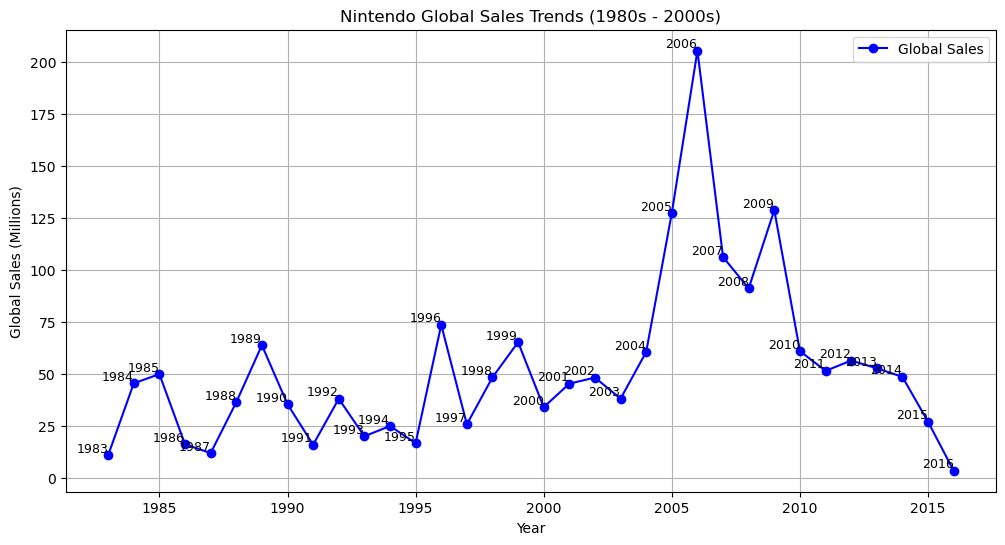

In [62]:
%matplotlib inline
# Group sales by year
sales_trend = Nintendo_vgsales.groupby("Year")["Global_Sales"].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, marker="o", linestyle="-", color="b", label="Global Sales")

# Annotate each point with the year and sales value
for year, sales in zip(sales_trend.index, sales_trend.values):
    plt.text(year, sales, f"{year}", fontsize=9, ha="right", va="bottom", color="black")  # Adjust alignment

# Labels and title
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.title("Nintendo Global Sales Trends (1980s - 2000s)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Key Observations:
1. There is a steady growth in sales in the late 1980s and 1990s, though sales fluctuated but it was consistent.
   
2. The peaks are around 1985, 1989, 1996 possibly a new version of the game was release that period.

3. There was a significant sales spike between 2005 - 2009, after which a decline follows, possibly due to competition release

4. 2006 marks the highest peak for the Nintendo sales


### 4. In Saudi Arabia, the 5-day workweek starts on Sunday. Analyze the impact of the weekend and weekday quote dates on the quote price.

Data: https://drive.google.com/file/d/1vROMYOn9OUrIS7ChIIzkGpjeEdxm5Pe1/view?usp=sharing

In [63]:
luxury_goods = pd.read_csv("luxury_goods_selling_transaction - quote_sell_dataset - luxury_goods_selling_transaction - quote_sell_dataset.csv")
luxury_goods.head()

,Quote ID,Product Name,Purchased Year,Luxury Brand,Selling Platform,Quote Date,Quote Price,Sold Price,Category,Condition,Status,Payment Method
0,2842302,ALEXANDER WANG Rhinestone Mesh Mini,2019,Alexander Wang,Fashionphile,2022-11-03,300.0,300.0,handbag,Pre-owned,Completed,ACH
1,2455752,BALENCIAGA Agneau Classic Hardware City,2014,Balenciaga,Fashionphile,2022-04-27,450.0,450.0,handbag,Pre-owned,Completed,Paypal
2,2455734,BALENCIAGA Chevre Gold Metallic Edge,2013,Balenciaga,Fashionphile,2022-04-26,950.0,950.0,handbag,Pre-owned,Completed,Paypal
3,18640,Baobao Issey Miyake clutch,2020,Baobao,CoutureUSA,2022-11-16,142.5,0.0,handbag,New,Seller Declined,NaN
4,18957,Burberry Nova check tote,2016,Burberry,CoutureUSA,2022-12-05,290.0,0.0,handbag,Pre-owned,Seller Declined,NaN


In [64]:
#checking for the content of the dataset
luxury_goods.shape

(66, 12)

In [65]:
#checking if there are missing value(s)
luxury_goods.isnull().sum()

Quote ID             0
Product Name         0
Purchased Year       0
Luxury Brand         0
Selling Platform     0
Quote Date           0
Quote Price          0
Sold Price           0
Category             0
Condition            0
Status               0
Payment Method      43
dtype: int64

payment method column has 43 missing values which is alots for a 66 rows dataset

In [66]:
#filling the missing values in payment method with unknown
luxury_goods['Payment Method'].fillna('Unknown', inplace=True)

C:\Users\baliq\AppData\Local\Temp\ipykernel_11856\2699779576.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  luxury_goods['Payment Method'].fillna('Unknown', inplace=True)


In [67]:
#Rechecking the missing values
luxury_goods.isnull().sum()

Quote ID            0
Product Name        0
Purchased Year      0
Luxury Brand        0
Selling Platform    0
Quote Date          0
Quote Price         0
Sold Price          0
Category            0
Condition           0
Status              0
Payment Method      0
dtype: int64

In [68]:
#checking for duplicate(s) in the dataset
luxury_goods_dup = luxury_goods.duplicated()
print(luxury_goods_dup.sum())

0


In [69]:
luxury_goods.describe()

,Quote ID,Purchased Year,Quote Price,Sold Price
count,6.600000e+01,66.000000,66.000000,66.000000
mean,1.000433e+06,2018.484848,842.113636,233.272727
std,1.166035e+06,2.047456,1127.554214,533.547707
min,1.784300e+04,2013.000000,0.000000,0.000000
25%,1.837925e+04,2018.000000,245.000000,0.000000
50%,8.845015e+05,2019.000000,442.250000,0.000000
75%,2.455748e+06,2020.000000,700.000000,300.000000
max,2.913252e+06,2022.000000,5370.000000,3500.000000


In [70]:
luxury_goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quote ID          66 non-null     int64  
 1   Product Name      66 non-null     object 
 2   Purchased Year    66 non-null     int64  
 3   Luxury Brand      66 non-null     object 
 4   Selling Platform  66 non-null     object 
 5   Quote Date        66 non-null     object 
 6   Quote Price       66 non-null     float64
 7   Sold Price        66 non-null     float64
 8   Category          66 non-null     object 
 9   Condition         66 non-null     object 
 10  Status            66 non-null     object 
 11  Payment Method    66 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 6.3+ KB


In Saudi Arabia, the 5-day workweek starts on Sunday. Analyze the impact of the weekend and weekday quote dates on the quote price

Query 4 Answer:

In [71]:
#convert to datetime
luxury_goods["Quote Date"] = pd.to_datetime(luxury_goods["Quote Date"])

# Extract day of the week (0=Monday, 6=Sunday)
luxury_goods['Weekday'] = luxury_goods['Quote Date'].dt.dayofweek

# Map to Saudi Arabian workweek names
saudi_workweek = {
    6: "Sunday", 0: "Monday", 1: "Tuesday", 2: "Wednesday",
    3: "Thursday", 4: "Friday", 5: "Saturday"
}
luxury_goods['Weekday Name'] = luxury_goods['Weekday'].map(saudi_workweek)


In [72]:
#Categorizing as weekday or weekend (noting that friday and Saturday are weekened in Saudi Arabia)
luxury_goods['Is_Weekend'] = luxury_goods['Weekday Name'].isin(["Friday", "Saturday"])

Is_Weekend will be True for Friday and Saturday but will be false for Sunday-Thursday

In [73]:
#comparing quote price for weekday and weekend
luxury_goods.groupby("Is_Weekend")["Quote Price"].mean()

Is_Weekend
False    841.973214
True     842.900000
Name: Quote Price, dtype: float64

There is no significant difference between quote prices on weekdays and weekends in the dataset.

In [74]:
#checking the count of weekday and weekend 
luxury_goods['Is_Weekend'].value_counts()

Is_Weekend
False    56
True     10
Name: count, dtype: int64

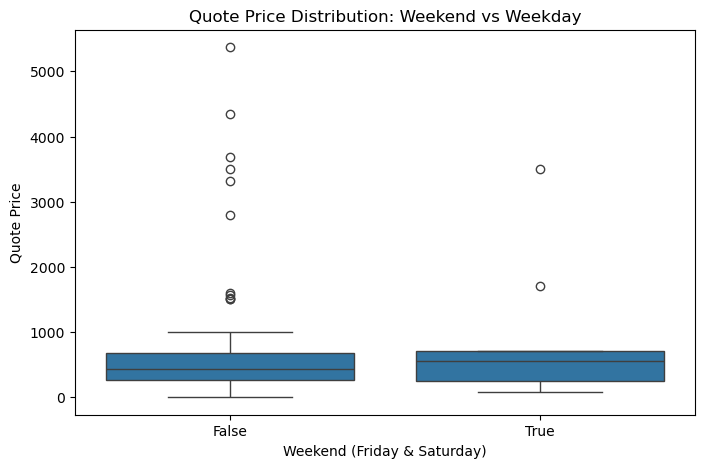

In [75]:
#Visualising the difference
plt.figure(figsize=(8, 5))
sns.boxplot(x=luxury_goods["Is_Weekend"], y=luxury_goods["Quote Price"])
plt.xlabel("Weekend (Friday & Saturday)")
plt.ylabel("Quote Price")
plt.title("Quote Price Distribution: Weekend vs Weekday")
plt.savefig("plot.png") 
plt.show()

There are many extreme outliers above 3000-5000, particularly on weekdays. The outliers could be affecting the mean, making it unreliable.

In [76]:
#checking for the median of the weekdays and weekend
luxury_goods.groupby("Is_Weekend")["Quote Price"].median()

Is_Weekend
False    440.00
True     549.75
Name: Quote Price, dtype: float64

The box sizes (IQR) look similar, meaning the middle 50% of values have similar spread.

This suggests that quote prices fluctuate at a similar rate on both weekdays and weekends.

The weekday group (False) has more extreme outliers, some above 5000.

The weekend group (True) has fewer extreme values.

And since the weekday group has more high-value outliers, the mean is likely inflated.

This is why the median (549.75 vs. 440) is a better measure of central tendency in this case.

Weekend quote prices tend to be higher than weekday prices, as indicated by the higher weekend median, which is a more reliable measure than the mean, 
as the weekday mean may be skewed by high-value outliers.

In [77]:

!cd 


C:\Users\baliq
